# About Dataset:

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

#### Content
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for - eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## open dataset:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


find the number of people and the amount of credit by category:
- man/woman up to 25
- man/woman from 25 to 40
- man/woman over 40

In [4]:
df['SEX'].unique()

array([2, 1], dtype=int64)

discretize age:

In [5]:
bins = [ 0, 25, 40, 100] 
labels = ['up to 25', 'from 25 to 40', 'over 40']  
df['Age_Group'] = pd.cut(df['AGE'], bins, labels)

In [6]:
res = df.groupby(['SEX', 'Age_Group'])['LIMIT_BAL'].sum()/1000000
res=res.reset_index()
res



,SEX,Age_Group,LIMIT_BAL
0,1,"(0, 25]",62.07000
1,1,"(25, 40]",1229.67000
2,1,"(40, 100]",652.18368
3,2,"(0, 25]",223.47000
4,2,"(25, 40]",2057.28000
5,2,"(40, 100]",799.85600


In [7]:
table = pd.pivot_table(res, values='LIMIT_BAL', index='SEX', columns='Age_Group')
table.columns = ['up to 25', 'from 25 to 40', 'over 40']
table.index = ['man', 'woman']
table

,up to 25,from 25 to 40,over 40
man,62.07,1229.67,652.18368
woman,223.47,2057.28,799.85600



find what percentage pays the loan on time and late for each month:

In [8]:
data = {
    'September': df.groupby('PAY_0')['ID'].count(),
    'August': df.groupby('PAY_2')['ID'].count(),
    'July': df.groupby('PAY_3')['ID'].count(),
    'June': df.groupby('PAY_4')['ID'].count(),
    'May': df.groupby('PAY_5')['ID'].count(),
    'April': df.groupby('PAY_6')['ID'].count(),
}

new_table = pd.DataFrame(data)
new_table = new_table.fillna(0)
new_table


,September,August,July,June,May,April
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,0.0,0.0
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


In [9]:
new_table = new_table.drop([-2, 0])

In [10]:
new_table

,September,August,July,June,May,April
-1,5686,6050,5938,5687,5539.0,5740.0
1,3688,28,4,2,0.0,0.0
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0
8,19,1,3,2,1.0,2.0


In [11]:
new_table = new_table.div(new_table.sum(axis=0), axis=1) * 100
new_table

,September,August,July,June,May,April
-1,45.473448,57.684973,58.496700,61.835381,65.111085,65.086745
1,29.494562,0.266972,0.039405,0.021746,0.000000,0.000000
2,21.329175,37.442792,37.621909,34.348157,30.868696,31.364100
3,2.575176,3.108314,2.364299,1.957160,2.092394,2.086404
4,0.607806,0.943936,0.748695,0.750245,0.987422,0.555619
5,0.207933,0.238368,0.206876,0.380559,0.199835,0.147409
6,0.087972,0.114416,0.226579,0.054366,0.047020,0.215444
7,0.071977,0.190694,0.265984,0.630640,0.681791,0.521601
8,0.151951,0.009535,0.029554,0.021746,0.011755,0.022678


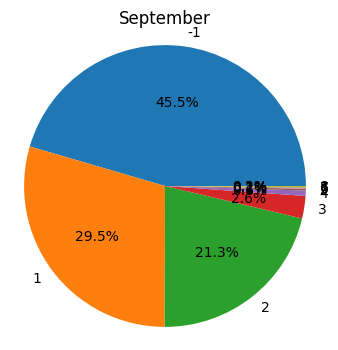

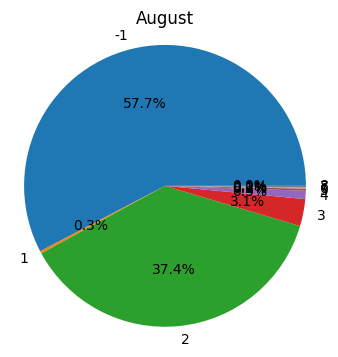

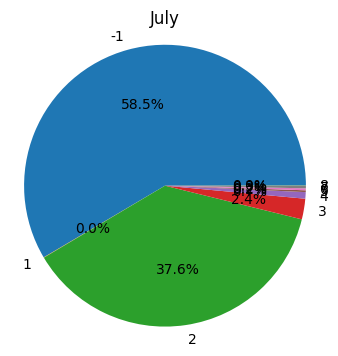

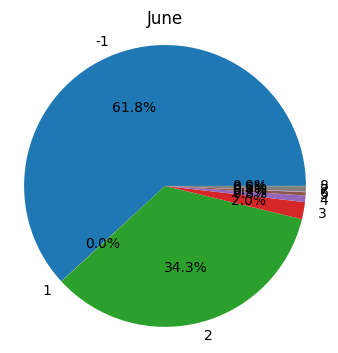

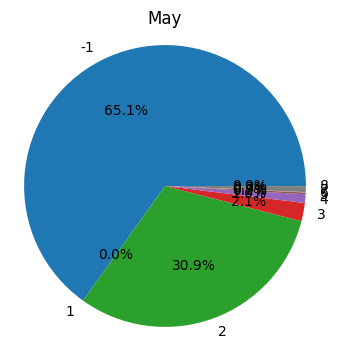

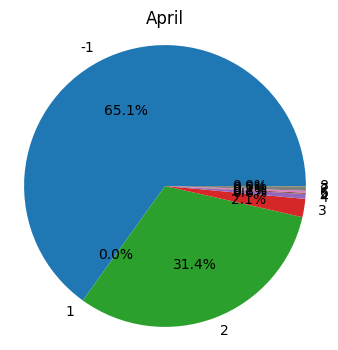

In [12]:

months = new_table.columns
titles = ["September", "August", "July", "June", "May", "April"]
for i, month in enumerate(months):
    plt.figure(figsize=(4,4))
    plt.pie(new_table[month], labels=new_table.index, autopct='%1.1f%%')
    plt.axis('equal') 
    plt.title(titles[i])
    plt.show()


